<a href="https://colab.research.google.com/github/dapaa03/Data-mining/blob/main/077_Muhammad_Raza_Daffa_Gibrani_POST_TEST_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [3]:
df = pd.read_excel("posttest2.xlsx",sheet_name="Dataset PostTest") # df untuk membaca file excel dataset.xlsx dengan method read_excel dengan nama sheet DatasetBaru - Sheet1

# Lihat Data Tabular item pada variavel dfa
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.sum() # menghitung jumlah nilai di setiap kolom

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [5]:
df.columns # mengetahui kolom apa saja yang ada pada dataset tersebut

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [6]:
from itertools import permutations #Library untuk buat kombinasi barang
rules = list(permutations(df.columns, 2)) # untuk menyimpan seluruh kemungkinan kombinasi barang
rules # untuk menampilkan keseluruhan hasil kombinasi

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [7]:
# Menghitung kemunculan kombinasi yang ada pada dataset
rule_baru = [] # Menyimpan data yang ada dalam bentuk list
for rule in rules: # Mengulangi pembacaan dataset
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0: # Menentukan apakah kombinasi tersebut ada atau tidak
    rule_baru.append(rule) # Menyimpan hasil pengecekan dalam bentuk tuple didalam list
rule_baru # Menampilkan hasil

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [8]:
hitung = {} # Menyimpan data dalam bentuk dictionary
for rule in rule_baru:  # Mengulangi pembacaan dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary
hitung # Menampilkan hasil

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [ ]:
# Melihat banyak transaksi
len(df)

19

In [9]:
# List support
# 
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%") # Menghitung support pada tiap tiap kombinasi item dan menampilkannya

('whole milk', 'pasrty') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pasrty', 'whole milk') support = 5.263157894736842%
('pasrty', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pasrty') support = 5.263157894736842%
('salty snack', 'root vegetables') support = 5.263157894736842%
('salty snack', 'detergent') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'yogurt') support = 5.263157894736842%
('sausage', 'hygiene articles'

In [10]:
# List Confidens

for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%") # Menghitung confidence pada tiap tiap kombinasi item dan menampilkannya

whole milk->pasrty  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pasrty->whole milk  Confidence = 100.0%
pasrty->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 50.0%
salty snack->pasrty  Confidence = 50.0%
salty snack->root vegetables  Confidence = 50.0%
salty snack->detergent  Confidence = 50.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->yogurt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt-

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

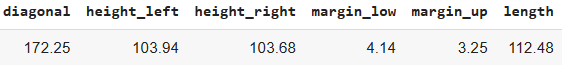
<!-- 1412 -->

### Collect and Describe Data

In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/dapaa03/Dataset-DM/main/deteksi_uang_palsu.csv")
df2

### 1. Membuat tabel jarak berdasarkan data baru yang ingin ditambahkan

In [ ]:
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal'    : [172.25],
                         'height_left' : [103.94],
                         'height_right': [103.68],
                         'margin_low'  : [4.14],
                         'margin_up'   : [3.25],
                         'length'      : [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
distances = []
for i in range(len(df2)):
    row = df2.iloc[i]
    distance = np.sqrt((row['diagonal'] - new_data['diagonal']) ** 2 +
                       (row['height_left'] - new_data['height_left']) ** 2 +
                       (row['height_right'] - new_data['height_right']) ** 2 +
                       (row['margin_low'] - new_data['margin_low']) ** 2 +
                       (row['margin_up'] - new_data['margin_up']) ** 2 +
                       (row['length'] - new_data['length']) ** 2)
    distances.append(distance)

# Menambahkan kolom distance ke dataframe utama
df2['distance'] = distances

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df2['distance'])


### 1.1 Menambahkan Kolom Jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

df2

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,distance
0,True,172.06,104.24,103.66,4.24,3.10,113.02,0 0.671267 dtype: float64
1,True,171.66,103.68,103.41,4.35,3.33,113.74,0 1.458321 dtype: float64
2,True,172.23,104.00,103.35,4.43,2.95,113.12,0 0.834626 dtype: float64
3,True,172.07,104.21,103.82,4.29,3.35,113.30,0 0.910934 dtype: float64
4,True,171.79,104.57,104.04,4.26,3.15,113.46,0 1.312593 dtype: float64
5,False,172.00,104.23,104.52,5.76,3.37,110.94,0 2.421281 dtype: float64
6,False,171.56,104.03,103.93,5.47,3.50,111.67,0 1.741896 dtype: float64
7,False,171.90,104.33,104.40,4.70,3.31,112.12,0 1.113463 dtype: float64
8,False,171.84,104.06,104.10,4.87,3.25,111.04,0 1.722034 dtype: float64
9,False,172.11,104.14,104.15,4.84,3.28,110.98,0 1.738217 dtype: float64


### 2. Mengurutkan data berdasarkan K jarak terdekat (dengan k = akar 2 dari banyak data)

In [ ]:
# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df2['distance'] = np.sqrt(
    (df2['diagonal'] - 172.25)**2
    + (df2['height_left'] - 103.94)**2
    + (df2['height_right'] - 103.68)**2
    + (df2['margin_low'] - 4.14)**2
    + (df2['margin_up'] - 3.25)**2
    + (df2['length'] - 112.48)**2
)

# Mengurutkan data dari kecil ke besar dan menentukan data terdekat
k = int(np.sqrt(len(df2)))
data_terdekat = df2.sort_values('distance').head(k)

# Menampilkan data terdekat
print(data_terdekat)


   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


### 3.  Menentukan hasil prediksi berdasarkan label terbanyak



In [ ]:
# Mengimpor library sklearn untuk menggunakan algoritma KNN
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df2.drop(columns=['is_genuine','distance'],axis=1)
y_train = df2['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)

print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True ")
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 
Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Muhammad Raza Daffa Gibrani

> Nim : 2109116077


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# KNN

### Business Understanding

* Goals Perusahaan : 

1. Membantu calon mahasiswa dan keluarga mereka dalam memilih perguruan 
tinggi yang tepat: Dataset ini dapat digunakan oleh perusahaan atau organisasi pendidikan untuk membuat alat pencarian perguruan tinggi online yang memungkinkan calon mahasiswa mencari perguruan tinggi berdasarkan kriteria tertentu, seperti biaya kuliah, lokasi, dan program studi.

2. Memperbaiki kualitas pendidikan di perguruan tinggi dan universitas: Dataset ini dapat digunakan oleh perusahaan atau organisasi pendidikan untuk mengevaluasi kinerja perguruan tinggi dan universitas dalam berbagai bidang, termasuk tingkat kelulusan, pendanaan, dan kualitas pengajaran. Informasi ini dapat membantu perguruan tinggi dan universitas meningkatkan program akademik dan layanan pendukung yang mereka tawarkan.

* Tujuan Penggunaan DM : Analisis pasar pendidikan: Perusahaan atau organisasi dapat menggunakan data dari dataset ini untuk menganalisis pasar pendidikan, termasuk melihat tren biaya kuliah, jumlah mahasiswa, dan lokasi perguruan tinggi yang paling diminati. Analisis ini dapat membantu perusahaan atau organisasi memahami pasar pendidikan dan mengembangkan strategi untuk memasuki pasar atau meningkatkan layanan yang mereka tawarkan.

### Data Understanding

1. Collect Data
2. Penjelasan Setiap Kolom
3. Visualisasi dan Artinya


### Collect Data

In [11]:
df3 = pd.read_csv('https://raw.githubusercontent.com/dapaa03/Dataset-DM/main/degrees-that-pay-back.csv')

### Describe Data

In [12]:
df3

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,Biology,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,Business Management,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"


### Deskripsi Setiap Kolom

In [13]:
df3.info()

#Dataset yang diberikan terdiri dari 50 baris dan 8 kolom. Berikut ini adalah penjelasan untuk setiap kolom pada dataset tersebut:

# "Undergraduate Major": nama jurusan sarjana yang dimaksudkan dalam dataset.
# "Starting Median Salary": gaji median awal yang diterima oleh lulusan dalam setiap jurusan.
# "Mid-Career Median Salary": gaji median pertengahan karir yang diterima oleh lulusan dalam setiap jurusan.
# "Percent change from Starting to Mid-Career Salary": persentase perubahan gaji antara awal karir dan pertengahan karir lulusan dalam setiap jurusan.
# "Mid-Career 10th Percentile Salary": gaji pada persentil ke-10 di pertengahan karir lulusan dalam setiap jurusan.
# "Mid-Career 25th Percentile Salary": gaji pada persentil ke-25 di pertengahan karir lulusan dalam setiap jurusan.
# "Mid-Career 75th Percentile Salary": gaji pada persentil ke-75 di pertengahan karir lulusan dalam setiap jurusan.
# "Mid-Career 90th Percentile Salary": gaji pada persentil ke-90 di pertengahan karir lulusan dalam setiap jurusan.

# Dari informasi di atas, dapat diketahui bahwa kebanyakan kolom pada dataset ini memiliki tipe data "object", yaitu tipe data umum yang digunakan untuk merepresentasikan teks atau karakter dalam bentuk string. Namun, kolom "Percent change from Starting to Mid-Career Salary" memiliki tipe data "float64", yaitu tipe data untuk bilangan desimal dengan presisi ganda. Hal ini menunjukkan bahwa kolom tersebut menyimpan data numerik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


### Visualisasi dan Penjelasan

###### 1. Hubungan antara Jumlah Barang dan Penjualan

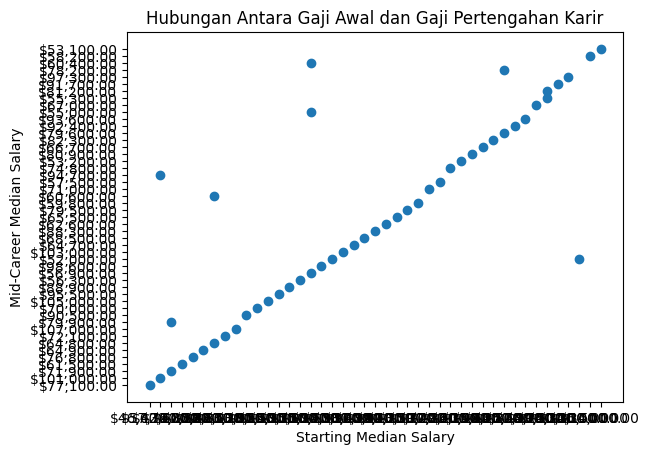

In [14]:
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/dapaa03/Dataset-DM/main/degrees-that-pay-back.csv')


# membuat scatter plot
plt.scatter(df['Starting Median Salary'], df['Mid-Career Median Salary'])
plt.xlabel('Starting Median Salary')
plt.ylabel('Mid-Career Median Salary')
plt.title('Hubungan Antara Gaji Awal dan Gaji Pertengahan Karir')
plt.show()

# Scatter plot diatas menunjukkan hubungan antara jumlah barang dengan penjualan.
# Setiap titik pada scatter plot menunjukkan jumlah barang dan penjualan dari suatu transaksi. 
# Semakin banyak jumlah barang yang dibeli, semakin tinggi penjualan yang dihasilkan.

### Data Preparation

In [15]:
df3.isna().sum()

Undergraduate Major                                  0
Starting Median Salary                               0
Mid-Career Median Salary                             0
Percent change from Starting to Mid-Career Salary    0
Mid-Career 10th Percentile Salary                    0
Mid-Career 25th Percentile Salary                    0
Mid-Career 75th Percentile Salary                    0
Mid-Career 90th Percentile Salary                    0
dtype: int64

### Cleaning Data

In [16]:
df3.drop(columns=["Undergraduate Major"])

,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
5,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"
6,"$38,800.00","$64,800.00",67.0,"$36,900.00","$47,400.00","$94,500.00","$135,000.00"
7,"$43,000.00","$72,100.00",67.7,"$38,800.00","$51,500.00","$102,000.00","$147,000.00"
8,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00"
9,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"
